<a href="https://colab.research.google.com/github/MrCherveN/DataAnalist-7-0_HomeTasks/blob/main/hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Python/Аналітик 7-0/Лекции/Модуль 4/data/yulu_rental.csv')

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

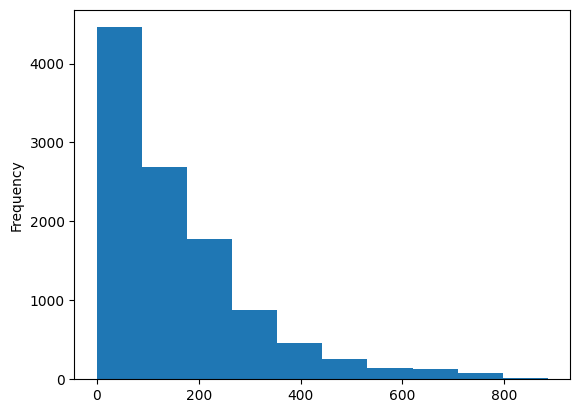

In [10]:
df['registered'].plot.hist()
plt.show()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

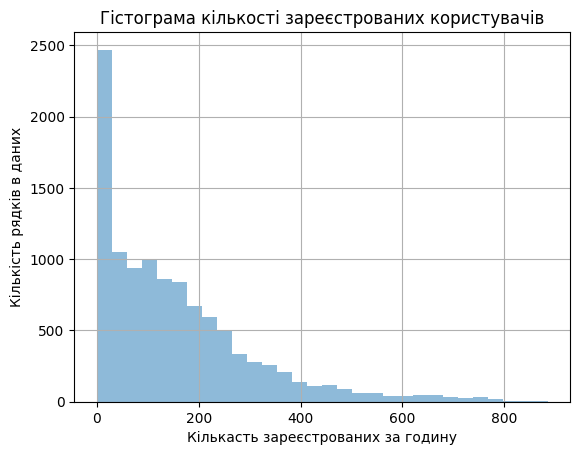

In [11]:
#варіант1
df['registered'].plot.hist(bins=30, alpha=0.5)
plt.grid(axis='both')
plt.xlabel('Кількасть зареєстрованих за годину')
plt.ylabel('Кількість рядків в даних')
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.show()

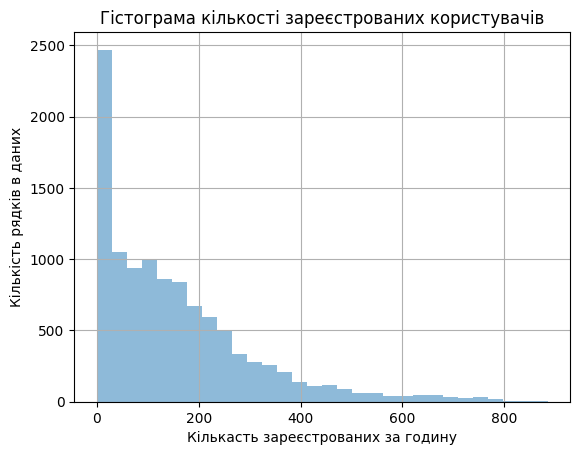

In [12]:
#варіант2
df['registered'].plot(kind='hist', title='Гістограма кількості зареєстрованих користувачів',
                      grid=True, alpha=0.5, bins=30, xlabel='Кількасть зареєстрованих за годину',
                      ylabel='Кількість рядків в даних'
                      )
plt.show();

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [14]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [15]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [18]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [ ]:
df_group = df[df['registered'] == 0].groupby('dayofweek').count()
df_group

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
dayofweek,,,,,,,,,,,,
0,5,5,5,5,5,5,5,5,5,5,5,5
1,3,3,3,3,3,3,3,3,3,3,3,3
2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,2,2,2,2,2,2,2,2,2,2,2,2


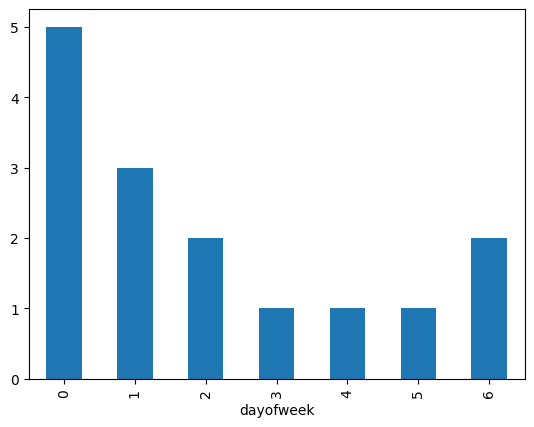

In [ ]:
df_group.plot.bar(y='registered', legend=False);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dayofweek'],
      dtype='object')

In [ ]:
df_group2 = df[['registered', 'weather']].groupby('weather').sum()
df_group2

,registered
weather,
1,1186163
2,419914
3,87106
4,158


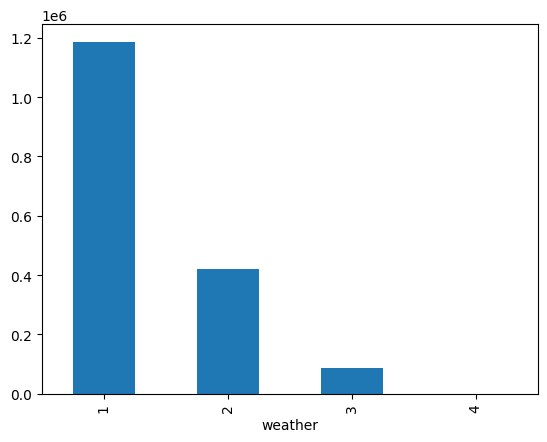

In [ ]:
df_group2.plot.bar(y='registered', legend=False);

**На мою думку:**, графік є логічним, оскільки відображає реалістичний попит користувачів велосипедів залежно від погодних умов. Як ми бачимо, попит на користування велосипедами є найвищим при хороших погодних умовах та зменшується при їх погіршенні.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

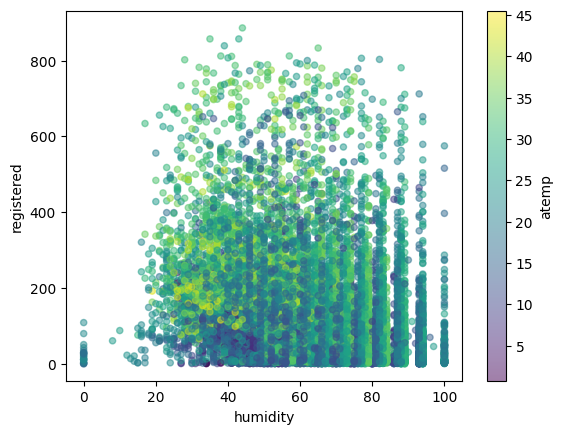

In [19]:
df.plot.scatter(x='humidity', y='registered', c='atemp', alpha=0.5);

З графіку видно:
1. основна концентрація зареєстрованих користувачів знаходиться в діапазоні вологості повітря 25-85 %;
2. є незрозумілі викиди при вологості повітря в районі 0% (можливо це помилки внесення даних);
3. є незначна концентрація в районі 100% (туман, дощ);
4. найбільші значення зареєстрованим користувачам відповідають коморфтним умовам вологості та температури за відчуттям. Наприклад, є точки з
кількістю зареєстрованих користувачів більше 800 в діапазоні вологості 40-60% та температурою за відчуттям 25-30%.
5. найвищі значення температури за відчуттям (від 40 градусів) відповідають середнім значенням вологості та кількості зареєстрованих корисувачів.

Складно сказати, чи є пряма залежність між показниками вологості та кількістю зареєстрованих користувачів. Скоріш за все вона є між температурою за відчуттям
та кількістю зареєстрованих користувачів.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)